In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import seaborn as sns
plt.rcParams['font.size'] = 24
sns.set(font_scale = 2)


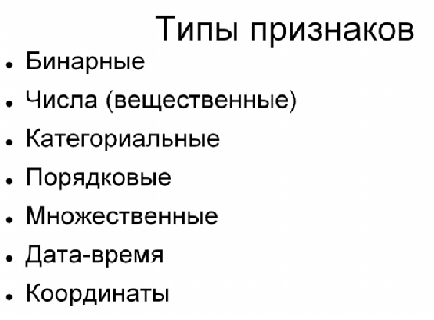

2013 - MSE - A B(-) D H(+) K M P

In [3]:
df = pd.read_excel('C:\\Users\\Semen\\Desktop\\2022\\3 semestr\\AI\\2013_nyc_ll84_disclosure.xlsx')
df.head()

2012 NYC Benchmark Data


,BBL,Street Number,Street Name,Borough,Zip,Benchmarking Submission,Entry Number,Site EUI\n(kBtu/ft2),Weather Normalized Source EUI\n(kBtu/ft2),Indoor Water Intensity (All Water Sources)\n(gal/ft2),Reported Water Method,ENERGY STAR Score,Total GHG Emissions\n(MtCO2e),Property Floor Area (Buildngs and Parking)\n(ft2),Primary Property Type - Self Selected,Number of Buildings,Reported BINs
0,1000010010,1,GOVERNORS ISLAND,MANHATTAN,10004,No Record as of 08/1/13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,1000020002,NaN,MARGINAL STREET,MANHATTAN,10004,No Record as of 08/1/13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,1000047501,1,WATER STREET,MANHATTAN,10004,Yes,41.0,102.0,287.9,16.370000,Manual,75,25932.68,2428325.0,Office,1,1000005
3,1000057501,125,BROAD STREET,MANHATTAN,10004,Yes,3871.0,119.6,261.5,NaN,Manual,70,11637.42,1338000.0,Office,1,1000006
4,1003620001,134,AVENUE D,MANHATTAN,10009,Yes,8312.0,30.3,85.7,1.571029,ABS,NaN,13709.99,5207812.0,Multifamily Housing,7,1077504;1077538;1077539;1077540;1077541;107754...


In [4]:
df.shape


(14112, 17)

In [5]:
df.columns

Index(['BBL', 'Street Number', 'Street Name', 'Borough', 'Zip',
       'Benchmarking Submission', 'Entry Number', 'Site EUI\n(kBtu/ft2)',
       'Weather Normalized Source EUI\n(kBtu/ft2)',
       'Indoor Water Intensity (All Water Sources)\n(gal/ft2)',
       'Reported Water Method', 'ENERGY STAR Score',
       'Total GHG Emissions\n(MtCO2e)',
       'Property Floor Area (Buildngs and Parking)\n(ft2)',
       'Primary Property Type - Self Selected', 'Number of Buildings',
       'Reported BINs'],
      dtype='object')

In [6]:
feature_A = 'BBL'
feature_D = 'Borough'
feature_H = 'Site EUI\n(kBtu/ft2)'
feature_K = 'Reported Water Method'
feature_M = 'Total GHG Emissions\n(MtCO2e)'
feature_P = 'Number of Buildings'
feature_L = 'ENERGY STAR Score'
df = df[[feature_A, feature_D, feature_H, feature_K, feature_M, feature_P, feature_L]]

In [7]:
df.shape

(14112, 7)

In [8]:
df.head()

,BBL,Borough,Site EUI\n(kBtu/ft2),Reported Water Method,Total GHG Emissions\n(MtCO2e),Number of Buildings,ENERGY STAR Score
0,1000010010,MANHATTAN,NaN,NaN,NaN,1,NaN
1,1000020002,MANHATTAN,NaN,NaN,NaN,0,NaN
2,1000047501,MANHATTAN,102.0,Manual,25932.68,1,75
3,1000057501,MANHATTAN,119.6,Manual,11637.42,1,70
4,1003620001,MANHATTAN,30.3,ABS,13709.99,7,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14112 entries, 0 to 14111
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BBL                           14112 non-null  int64  
 1   Borough                       14112 non-null  object 
 2   Site EUI
(kBtu/ft2)           11074 non-null  float64
 3   Reported Water Method         11989 non-null  object 
 4   Total GHG Emissions
(MtCO2e)  11024 non-null  float64
 5   Number of Buildings           14112 non-null  int64  
 6   ENERGY STAR Score             1872 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 771.9+ KB


In [10]:
df=df.dropna(axis = 0, thresh=3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14112 entries, 0 to 14111
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BBL                           14112 non-null  int64  
 1   Borough                       14112 non-null  object 
 2   Site EUI
(kBtu/ft2)           11074 non-null  float64
 3   Reported Water Method         11989 non-null  object 
 4   Total GHG Emissions
(MtCO2e)  11024 non-null  float64
 5   Number of Buildings           14112 non-null  int64  
 6   ENERGY STAR Score             1872 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 771.9+ KB


In [11]:
df = df.dropna(subset=[feature_L])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872 entries, 2 to 14103
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BBL                           1872 non-null   int64  
 1   Borough                       1872 non-null   object 
 2   Site EUI
(kBtu/ft2)           1871 non-null   float64
 3   Reported Water Method         1872 non-null   object 
 4   Total GHG Emissions
(MtCO2e)  1869 non-null   float64
 5   Number of Buildings           1872 non-null   int64  
 6   ENERGY STAR Score             1872 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 117.0+ KB


In [12]:
df[feature_L].unique()

array([75, 70, 55, 82, 41, 36, 90, 67, 80, 96, 72, 78, 88, 39, 60, 51, 50,
       76, 1, 65, 100, 79, 'Exempt', 84, 34, 74, 68, 77, 93, 89, 94, 92,
       61, 95, 35, 21, 59, 48, 49, 19, 54, 56, 81, 86, 69, 98, 14, 8, 29,
       45, 52, 27, 40, 31, 30, 71, 32, 9, 22, 20, 87, 15, 37, 91, 83, 58,
       5, 97, 64, 73, 10, 43, 12, 2, 85, 99, 42, 6, 4, 63, 44, 62, 17, 24,
       66, 26, 23, 38, 57, 16, 33, 47, 28, 53, 11, 3, 18, 46, 7, 25, 13],
      dtype=object)

In [13]:
df[feature_L] = pd.to_numeric(df[feature_L], errors = 'coerce')
df[feature_L].unique()

array([ 75.,  70.,  55.,  82.,  41.,  36.,  90.,  67.,  80.,  96.,  72.,
        78.,  88.,  39.,  60.,  51.,  50.,  76.,   1.,  65., 100.,  79.,
        nan,  84.,  34.,  74.,  68.,  77.,  93.,  89.,  94.,  92.,  61.,
        95.,  35.,  21.,  59.,  48.,  49.,  19.,  54.,  56.,  81.,  86.,
        69.,  98.,  14.,   8.,  29.,  45.,  52.,  27.,  40.,  31.,  30.,
        71.,  32.,   9.,  22.,  20.,  87.,  15.,  37.,  91.,  83.,  58.,
         5.,  97.,  64.,  73.,  10.,  43.,  12.,   2.,  85.,  99.,  42.,
         6.,   4.,  63.,  44.,  62.,  17.,  24.,  66.,  26.,  23.,  38.,
        57.,  16.,  33.,  47.,  28.,  53.,  11.,   3.,  18.,  46.,   7.,
        25.,  13.])

In [14]:
df = df.dropna(subset=[feature_L])
df.info()
df.to_excel('C:\\Users\\Semen\\Desktop\\2022\\3 semestr\\AI\\AI2_cut.xlsx', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1864 entries, 2 to 14103
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BBL                           1864 non-null   int64  
 1   Borough                       1864 non-null   object 
 2   Site EUI
(kBtu/ft2)           1863 non-null   float64
 3   Reported Water Method         1864 non-null   object 
 4   Total GHG Emissions
(MtCO2e)  1861 non-null   float64
 5   Number of Buildings           1864 non-null   int64  
 6   ENERGY STAR Score             1864 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 116.5+ KB


In [15]:
df[feature_H].nunique()

1131

In [16]:
df.head()

,BBL,Borough,Site EUI\n(kBtu/ft2),Reported Water Method,Total GHG Emissions\n(MtCO2e),Number of Buildings,ENERGY STAR Score
2,1000047501,MANHATTAN,102.0,Manual,25932.68,1,75.0
3,1000057501,MANHATTAN,119.6,Manual,11637.42,1,70.0
5,1000090001,MANHATTAN,99.5,Manual,7771.16,1,55.0
6,1000090014,MANHATTAN,79.7,Manual,4033.53,1,82.0
7,1000090029,MANHATTAN,139.4,Manual,10308.19,1,41.0


In [17]:
df[feature_D].unique()

array(['MANHATTAN', 'BROOKLYN', 'BRONX', 'QUEENS', 'STATEN ISLAND'],
      dtype=object)

In [18]:
df[feature_K].unique()

array(['Manual', 'ABS'], dtype=object)

In [19]:
df[feature_P].unique()

array([ 1,  2,  0,  4, 26,  3,  7,  5,  6,  8, 11, 21, 25], dtype=int64)

In [20]:
df[feature_M].nunique()

1837

In [21]:
df[feature_H].nunique()

1131

In [22]:
pd.isna(df[feature_H]).sum()

1

In [23]:
####### Заполним одно недостающее значение 'Site EUI\n(kBtu/ft2)' по среднему значению столбца
df[feature_H] = pd.to_numeric(df[feature_H], errors='coerce').astype('Float64')
df[feature_H] = df[feature_H].fillna(df[feature_H].mean())
pd.isna(df[feature_H]).sum()

0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1864 entries, 2 to 14103
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BBL                           1864 non-null   int64  
 1   Borough                       1864 non-null   object 
 2   Site EUI
(kBtu/ft2)           1864 non-null   Float64
 3   Reported Water Method         1864 non-null   object 
 4   Total GHG Emissions
(MtCO2e)  1861 non-null   float64
 5   Number of Buildings           1864 non-null   int64  
 6   ENERGY STAR Score             1864 non-null   float64
dtypes: Float64(1), float64(2), int64(2), object(2)
memory usage: 118.3+ KB


In [25]:
pd.isna(df[feature_M]).sum()

3

In [26]:
####### Заполним одно недостающее значение 'Total GHG Emissions\n(MtCO2e)' по среднему значению столбца
df[feature_M] = pd.to_numeric(df[feature_M], errors='coerce').astype('Float64')
df[feature_M] = df[feature_M].fillna(df[feature_M].mean())
pd.isna(df[feature_M]).sum()

0

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1864 entries, 2 to 14103
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BBL                           1864 non-null   int64  
 1   Borough                       1864 non-null   object 
 2   Site EUI
(kBtu/ft2)           1864 non-null   Float64
 3   Reported Water Method         1864 non-null   object 
 4   Total GHG Emissions
(MtCO2e)  1864 non-null   Float64
 5   Number of Buildings           1864 non-null   int64  
 6   ENERGY STAR Score             1864 non-null   float64
dtypes: Float64(2), float64(1), int64(2), object(2)
memory usage: 120.1+ KB


In [28]:
df[feature_A] = pd.to_numeric(df[feature_A], errors='coerce').astype('Int64')
df[feature_P] = pd.to_numeric(df[feature_P], errors='coerce').astype('Int64')
df[feature_L] = pd.to_numeric(df[feature_L], errors='coerce').astype('Int64')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1864 entries, 2 to 14103
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BBL                           1864 non-null   Int64  
 1   Borough                       1864 non-null   object 
 2   Site EUI
(kBtu/ft2)           1864 non-null   Float64
 3   Reported Water Method         1864 non-null   object 
 4   Total GHG Emissions
(MtCO2e)  1864 non-null   Float64
 5   Number of Buildings           1864 non-null   Int64  
 6   ENERGY STAR Score             1864 non-null   Int64  
dtypes: Float64(2), Int64(3), object(2)
memory usage: 125.6+ KB


In [30]:
df.describe()

,BBL,Site EUI\n(kBtu/ft2),Total GHG Emissions\n(MtCO2e),Number of Buildings,ENERGY STAR Score
count,1864.0,1864.0,1864.0,1864.0,1864.0
mean,1829675353.620172,932.978422,15092.117775,1.399142,62.752682
std,1244686943.758814,13152.704372,196373.903751,2.360554,29.283619
min,1000047501.0,0.3,2.01,0.0,1.0
25%,1008340055.0,55.3,432.0075,1.0,43.0
50%,1012840029.5,78.6,928.755,1.0,71.0
75%,3005417516.75,112.125,2252.6625,1.0,87.0
max,5074810001.0,494449.3,5913995.09,26.0,100.0


In [31]:
def delete_anomaly(df, feature):
    first_quartile = df[feature].describe()['25%']
    third_quartile = df[feature].describe()['75%']
    iqr = third_quartile - first_quartile
    lower_limit = first_quartile - 1.5 * iqr
    upper_limit = third_quartile + 1.5 * iqr
    df = df[(df[feature] > lower_limit) & (df[feature] < upper_limit)]
    return df

In [32]:
df = delete_anomaly(df, feature_H)
df = delete_anomaly(df, feature_A)
df = delete_anomaly(df, feature_M)

In [33]:
df.corr(numeric_only=True)[feature_L].sort_values()

Site EUI\n(kBtu/ft2)            -0.661515
Total GHG Emissions\n(MtCO2e)   -0.185402
Number of Buildings             -0.147142
BBL                             -0.083544
ENERGY STAR Score                1.000000
Name: ENERGY STAR Score, dtype: float64

In [34]:
figsize(20, 10)
def create_hist(df, feature):
    plt.style.use('fivethirtyeight')
    plt.hist(df[feature].dropna(), bins = 100, edgecolor = 'k');
    plt.ylabel('count')
    plt.xlabel(feature)
    plt.show()
    
def create_hist_with_border(df, feature, bins):
   plt.style.use('fivethirtyeight')
   plt.hist(df[feature].dropna(), bins=bins, edgecolor='k');
   plt.ylabel('count')
   plt.xlabel(feature)
   plt.show()

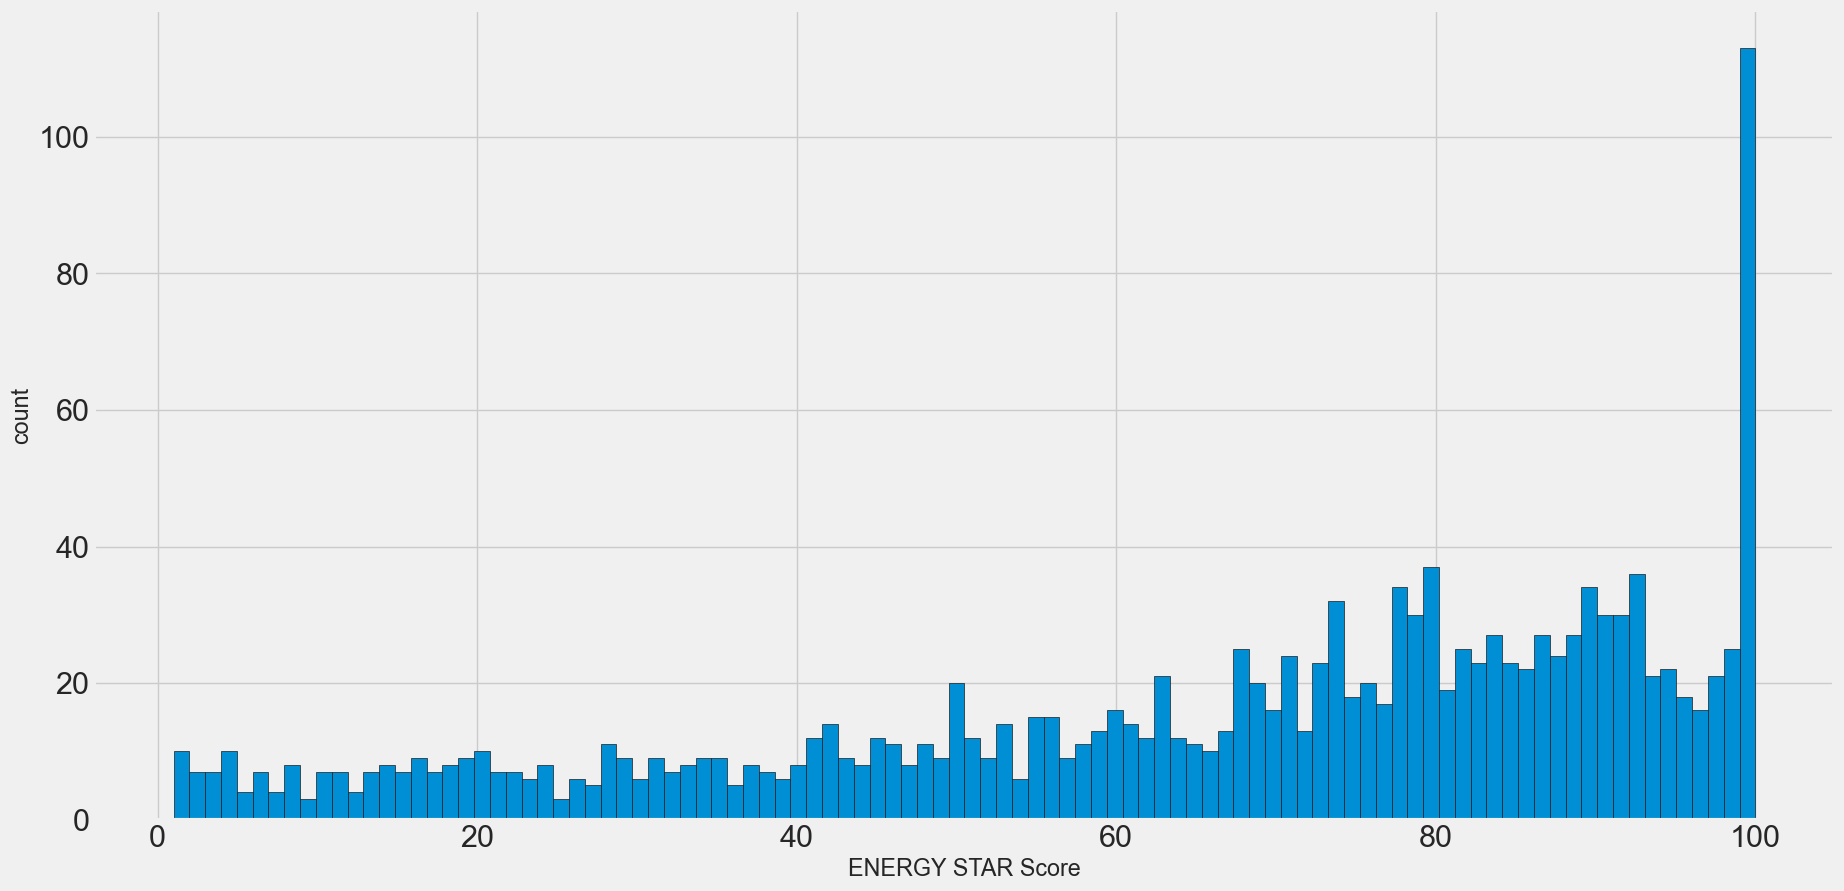

In [35]:
create_hist(df,feature_L)

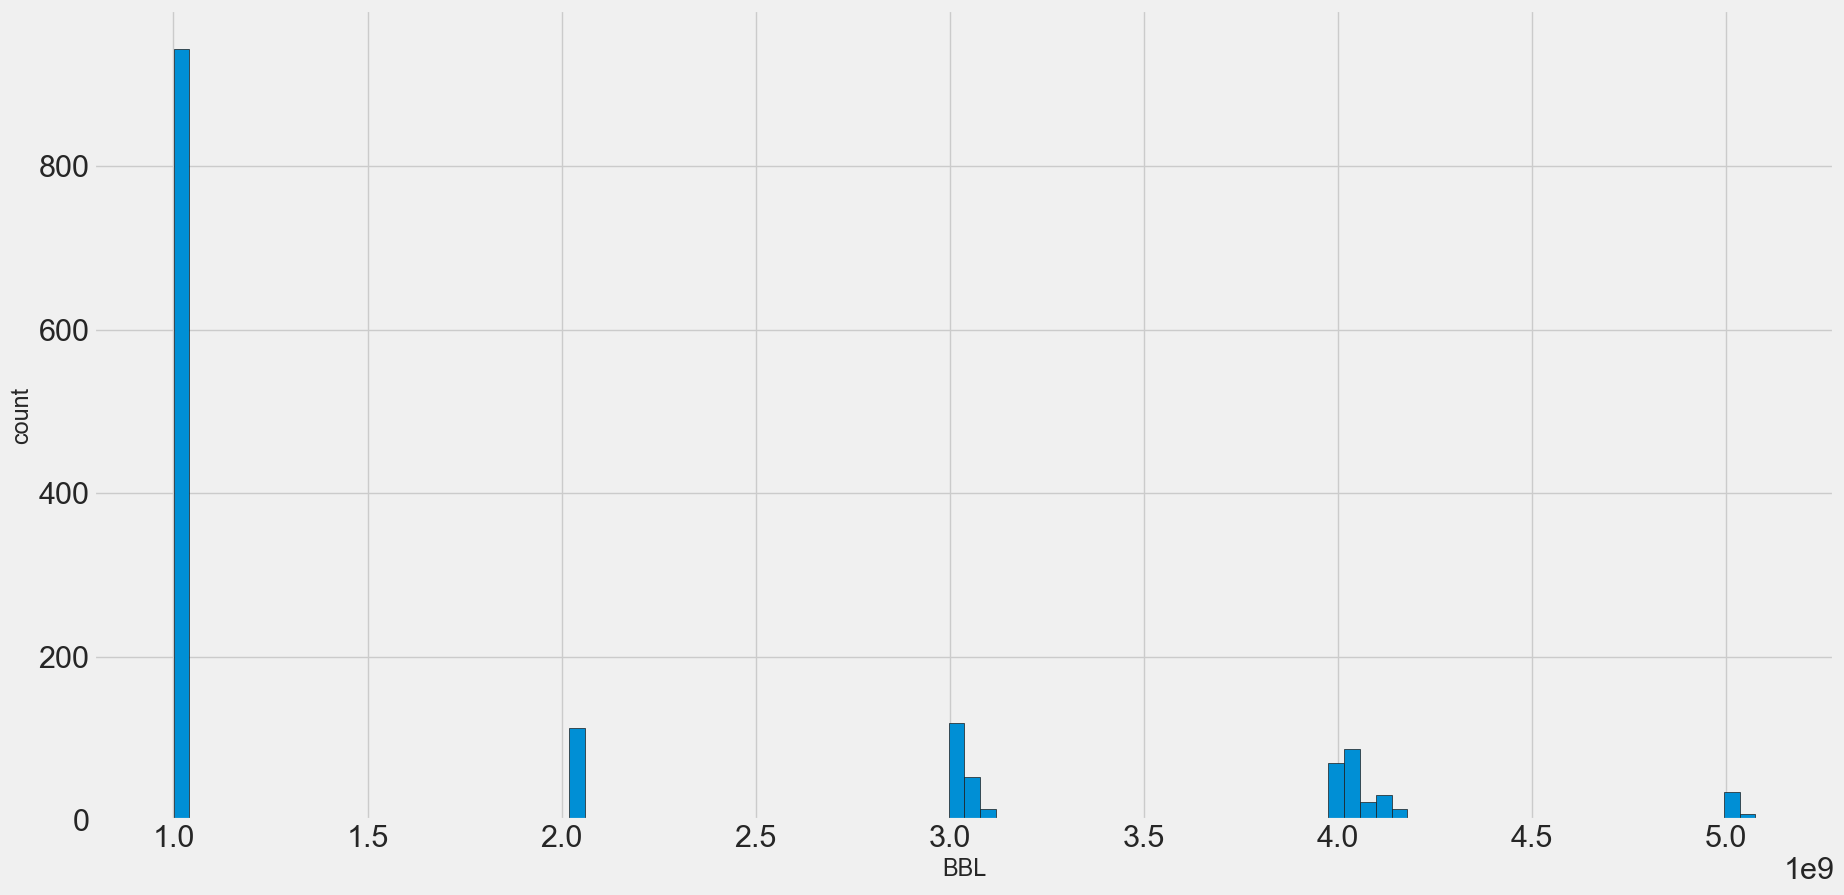

In [36]:
create_hist(df,feature_A)

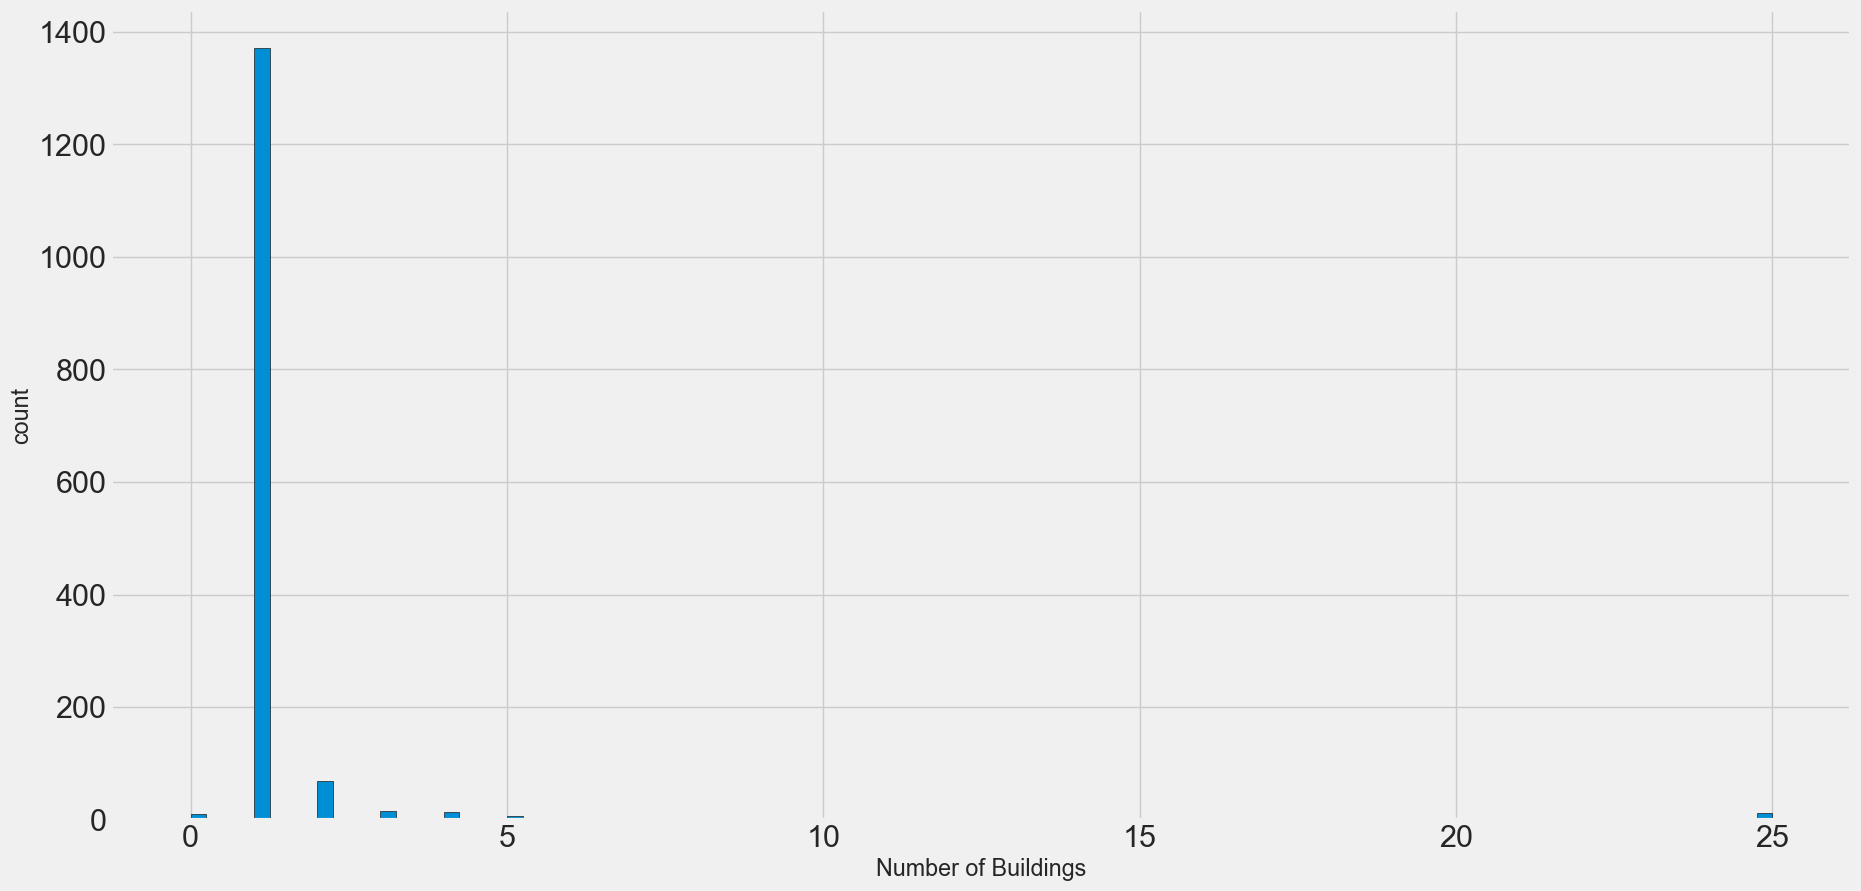

In [37]:
create_hist(df,feature_P)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1506 entries, 6 to 14103
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BBL                           1506 non-null   Int64  
 1   Borough                       1506 non-null   object 
 2   Site EUI
(kBtu/ft2)           1506 non-null   Float64
 3   Reported Water Method         1506 non-null   object 
 4   Total GHG Emissions
(MtCO2e)  1506 non-null   Float64
 5   Number of Buildings           1506 non-null   Int64  
 6   ENERGY STAR Score             1506 non-null   Int64  
dtypes: Float64(2), Int64(3), object(2)
memory usage: 101.5+ KB


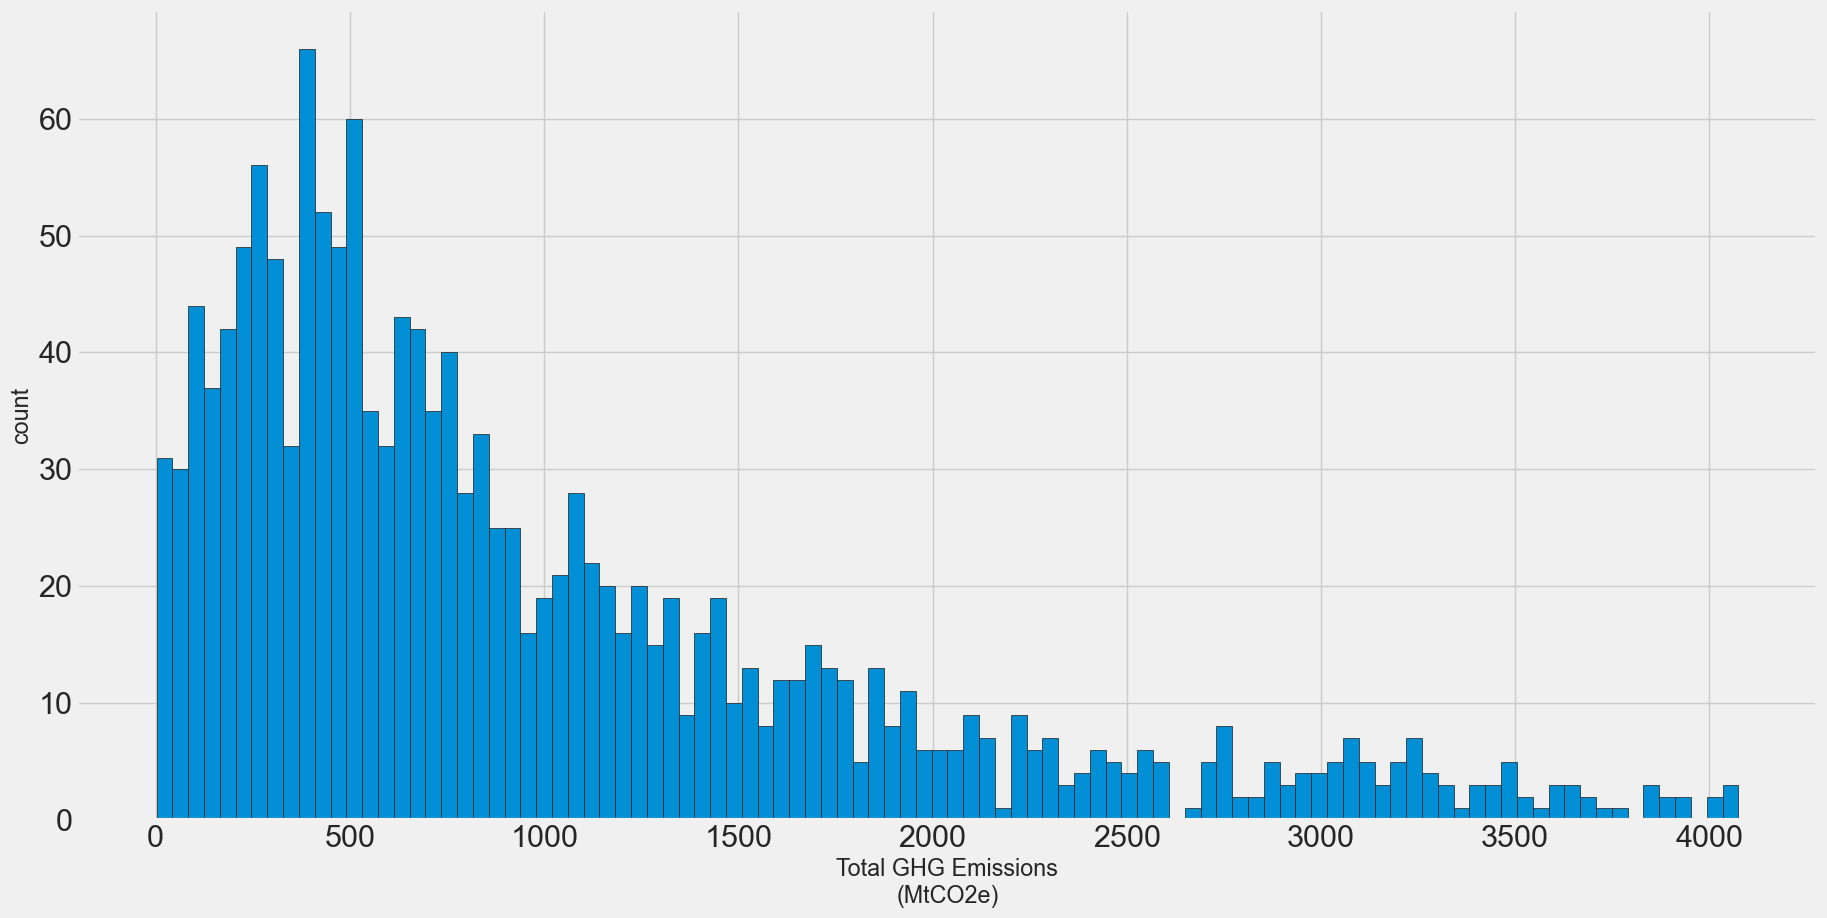

In [39]:
create_hist(df,feature_M)

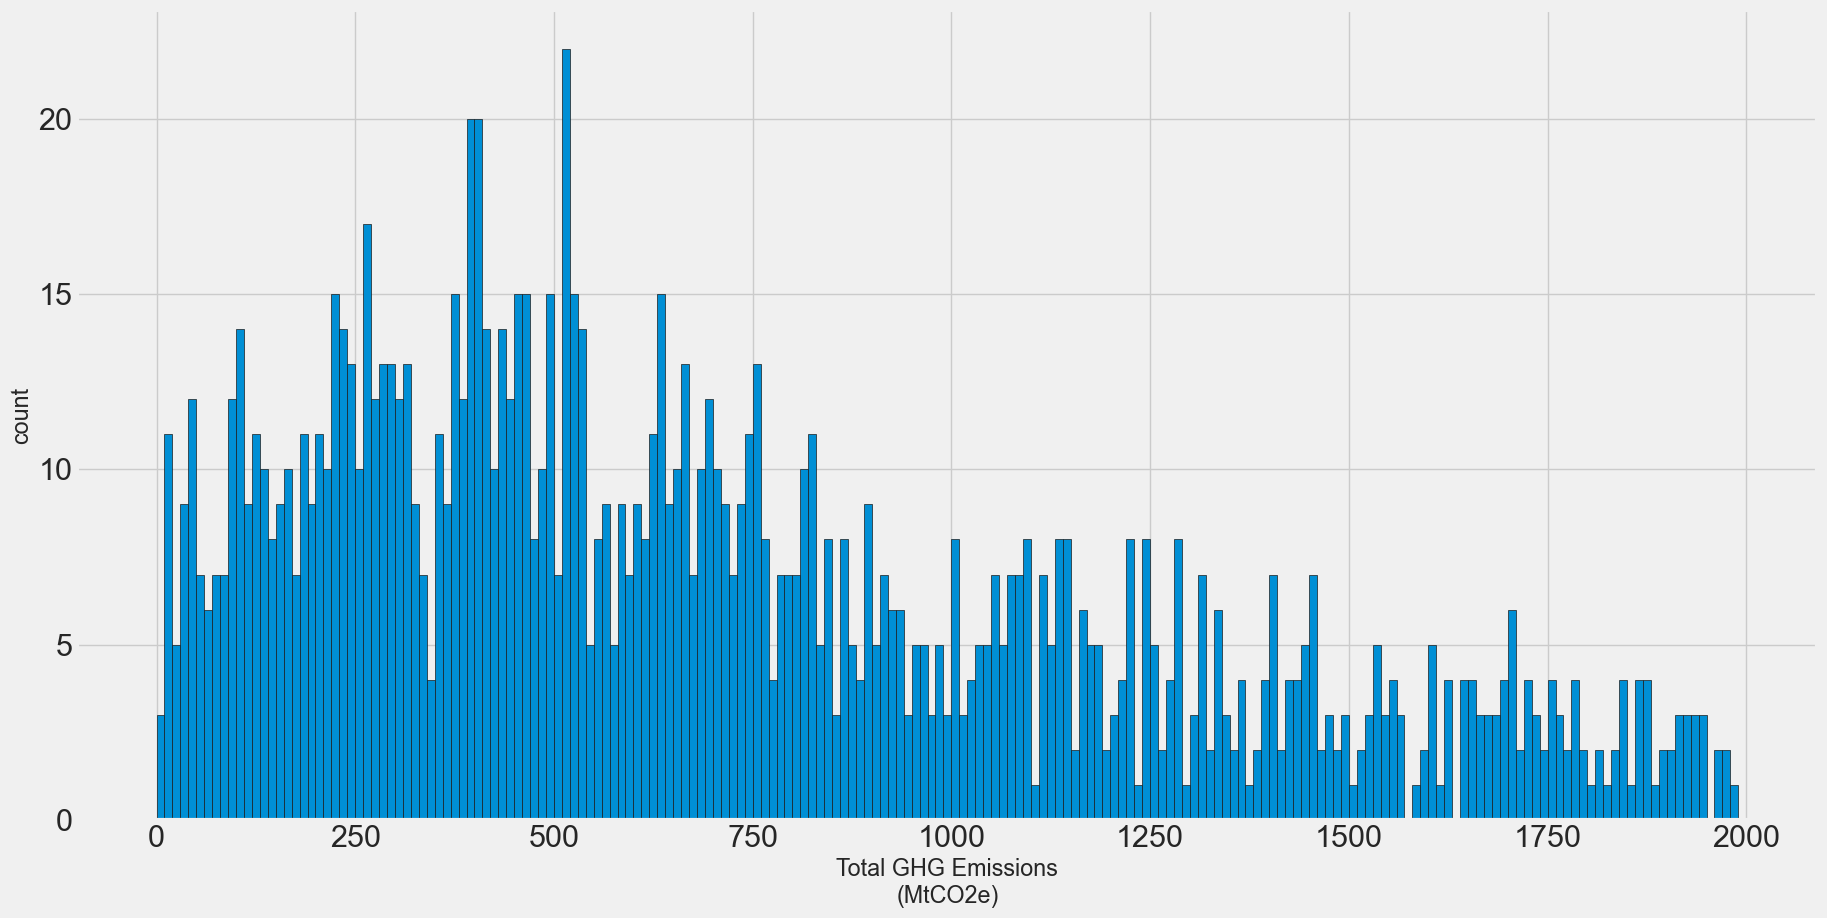

In [40]:
arr = np.arange(0, 2000, 10)
create_hist_with_border(df,feature_M, arr)

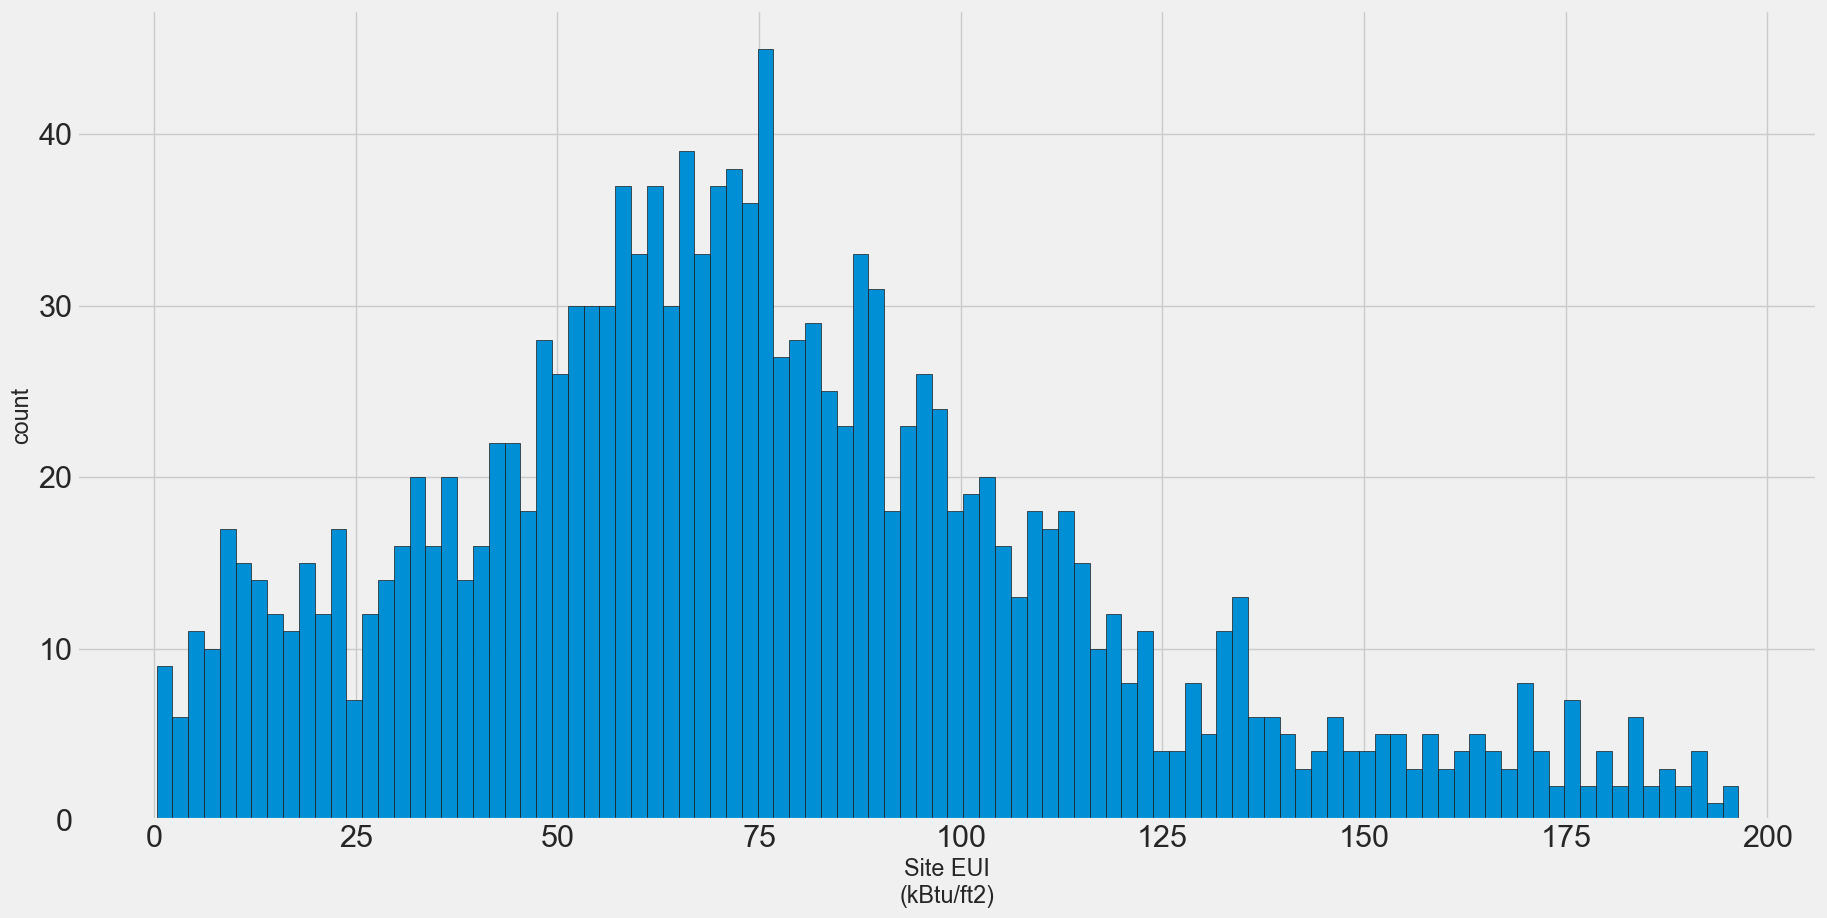

In [41]:
create_hist(df,feature_H)

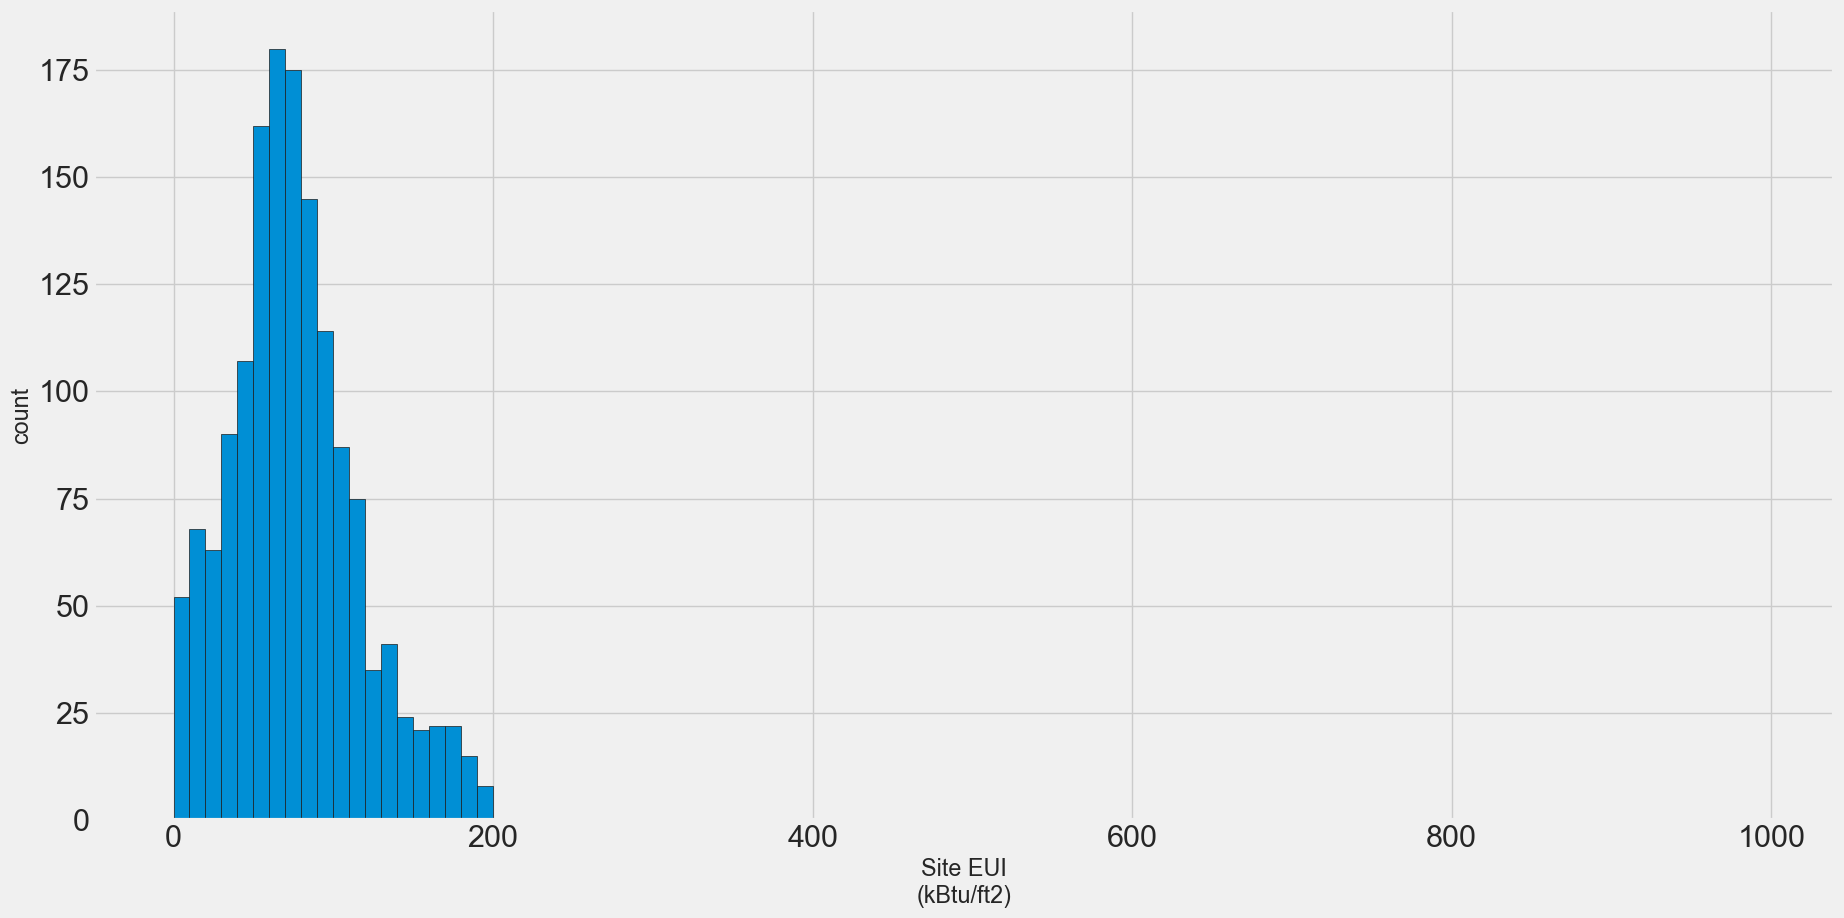

In [42]:
arr = np.arange(0, 1000, 10)
create_hist_with_border(df,feature_H, arr)

In [43]:
df[feature_H].max()

196.4

In [44]:
df[feature_H].min()

0.3

In [45]:
df.corr(numeric_only=True)[feature_L].sort_values()

Site EUI\n(kBtu/ft2)            -0.661515
Total GHG Emissions\n(MtCO2e)   -0.185402
Number of Buildings             -0.147142
BBL                             -0.083544
ENERGY STAR Score                1.000000
Name: ENERGY STAR Score, dtype: float64

In [46]:
def create_kdeplot(df, feature):
    types = df[feature].value_counts()
    types = list(types[types.values > 10].index)
    # Plot each building
    for b_type in types:
        # Select the building type
        subset = df[df[feature] == b_type]

        # Density plot of Energy Star scores
        sns.kdeplot(np.array(subset[feature_L].dropna()), label = b_type, fill = False, alpha = 0.8)
        #print(subset[feature_L].dropna())
    plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
    plt.legend()
    plt.show()

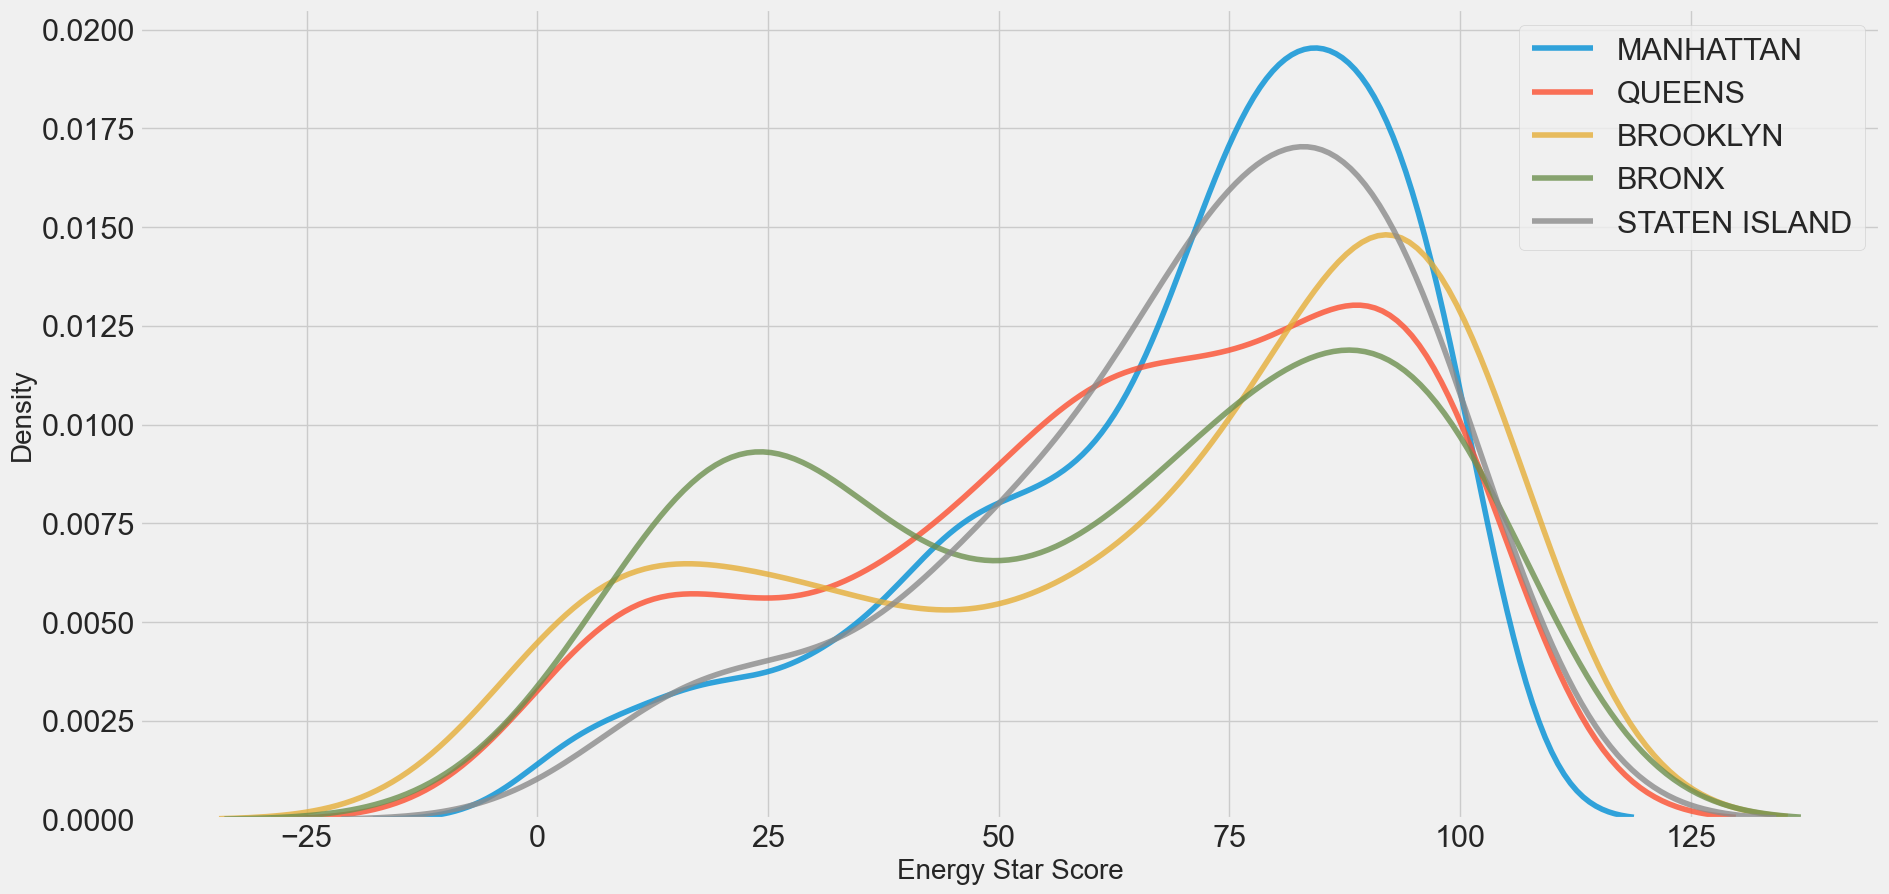

In [47]:
create_kdeplot(df, feature_D)

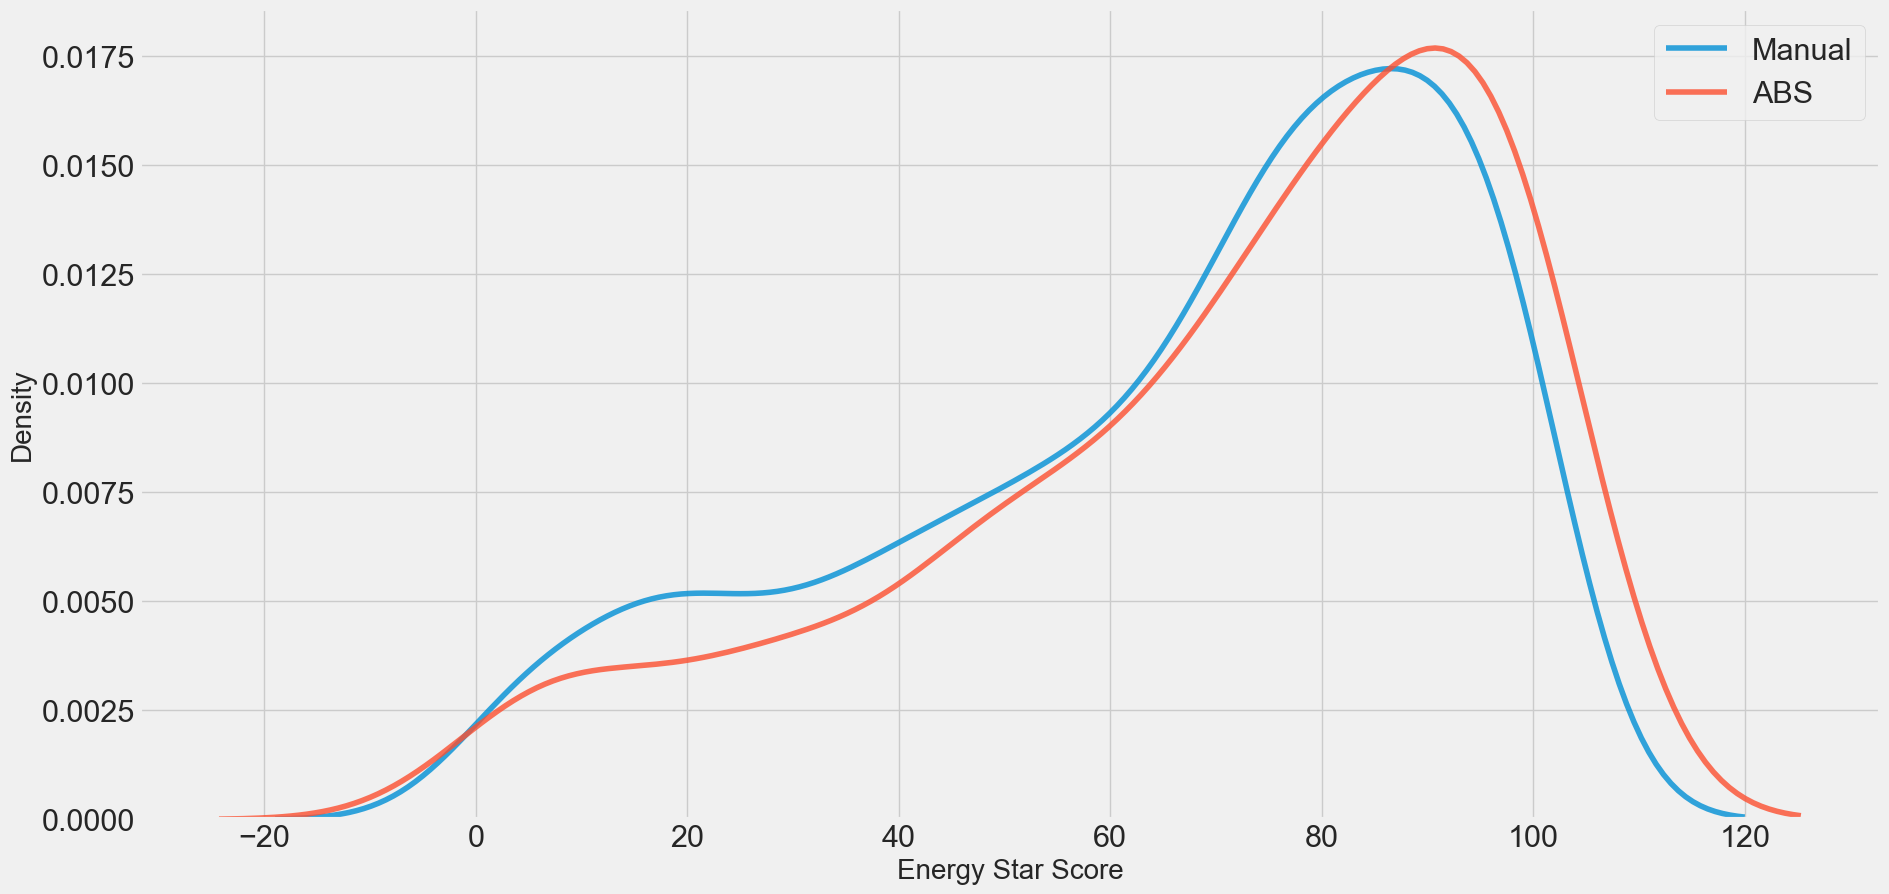

In [48]:
create_kdeplot(df, feature_K)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1506 entries, 6 to 14103
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BBL                           1506 non-null   Int64  
 1   Borough                       1506 non-null   object 
 2   Site EUI
(kBtu/ft2)           1506 non-null   Float64
 3   Reported Water Method         1506 non-null   object 
 4   Total GHG Emissions
(MtCO2e)  1506 non-null   Float64
 5   Number of Buildings           1506 non-null   Int64  
 6   ENERGY STAR Score             1506 non-null   Int64  
dtypes: Float64(2), Int64(3), object(2)
memory usage: 101.5+ KB


In [50]:
# One hot encode
ohe_tmp = df[[feature_D, feature_K]]
ohe_tmp.tail()

,Borough,Reported Water Method
14087,STATEN ISLAND,ABS
14094,STATEN ISLAND,Manual
14097,STATEN ISLAND,Manual
14099,STATEN ISLAND,Manual
14103,STATEN ISLAND,Manual


In [51]:
ohe_tmp = pd.get_dummies(ohe_tmp)
ohe_tmp.head()

,Borough_BRONX,Borough_BROOKLYN,Borough_MANHATTAN,Borough_QUEENS,Borough_STATEN ISLAND,Reported Water Method_ABS,Reported Water Method_Manual
6,0,0,1,0,0,0,1
9,0,0,1,0,0,0,1
10,0,0,1,0,0,0,1
12,0,0,1,0,0,1,0
13,0,0,1,0,0,0,1


In [52]:
df_result = pd.concat([df.drop(columns={feature_D, feature_K}, axis = 1), ohe_tmp], axis = 1)
df_result.head()

,BBL,Site EUI\n(kBtu/ft2),Total GHG Emissions\n(MtCO2e),Number of Buildings,ENERGY STAR Score,Borough_BRONX,Borough_BROOKLYN,Borough_MANHATTAN,Borough_QUEENS,Borough_STATEN ISLAND,Reported Water Method_ABS,Reported Water Method_Manual
6,1000090014,79.7,4033.53,1,82,0,0,1,0,0,0,1
9,1000100016,39.8,1405.66,1,90,0,0,1,0,0,0,1
10,1000100023,102.8,2939.91,1,67,0,0,1,0,0,0,1
12,1012900021,71.8,3091.99,1,80,0,0,1,0,0,1,0
13,1000110021,52.6,2254.53,1,96,0,0,1,0,0,0,1


In [53]:
# Дропнем столбец BBL, тк это идентификатор
df_result = df_result.drop([feature_A], axis = 1)

In [54]:
df_result.head()

,Site EUI\n(kBtu/ft2),Total GHG Emissions\n(MtCO2e),Number of Buildings,ENERGY STAR Score,Borough_BRONX,Borough_BROOKLYN,Borough_MANHATTAN,Borough_QUEENS,Borough_STATEN ISLAND,Reported Water Method_ABS,Reported Water Method_Manual
6,79.7,4033.53,1,82,0,0,1,0,0,0,1
9,39.8,1405.66,1,90,0,0,1,0,0,0,1
10,102.8,2939.91,1,67,0,0,1,0,0,0,1
12,71.8,3091.99,1,80,0,0,1,0,0,1,0
13,52.6,2254.53,1,96,0,0,1,0,0,0,1


In [55]:
df_result.describe()

,Site EUI\n(kBtu/ft2),Total GHG Emissions\n(MtCO2e),Number of Buildings,ENERGY STAR Score,Borough_BRONX,Borough_BROOKLYN,Borough_MANHATTAN,Borough_QUEENS,Borough_STATEN ISLAND,Reported Water Method_ABS,Reported Water Method_Manual
count,1506.0,1506.0,1506.0,1506.0,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000
mean,75.568924,987.799044,1.345286,66.673971,0.075033,0.122842,0.626826,0.148074,0.027224,0.230412,0.769588
std,39.995594,869.40538,2.289431,27.344522,0.263532,0.328365,0.483808,0.355292,0.162791,0.421236,0.421236
min,0.3,2.01,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.7,375.8825,1.0,49.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,71.8,698.625,1.0,74.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,96.8,1345.44,1.0,89.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,196.4,4074.64,25.0,100.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
df_result.columns

Index(['Site EUI\n(kBtu/ft2)', 'Total GHG Emissions\n(MtCO2e)',
       'Number of Buildings', 'ENERGY STAR Score', 'Borough_BRONX',
       'Borough_BROOKLYN', 'Borough_MANHATTAN', 'Borough_QUEENS',
       'Borough_STATEN ISLAND', 'Reported Water Method_ABS',
       'Reported Water Method_Manual'],
      dtype='object')

In [57]:
df_result.shape

(1506, 11)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics

In [59]:
labels = df_result[feature_L]
data = df_result.drop([feature_L], axis = 1)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1204, 10)
(302, 10)
(1204,)
(302,)


Text(0.5, 1.0, 'train data')

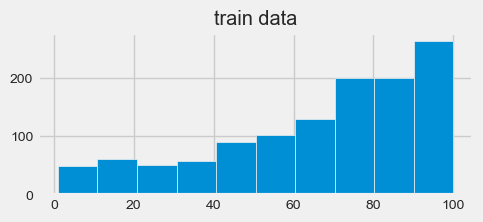

In [61]:
figsize(5,2)
plt.rcParams['font.size'] = 10
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10
plt.hist(y_train)
plt.title('train data')

Text(0.5, 1.0, 'test data')

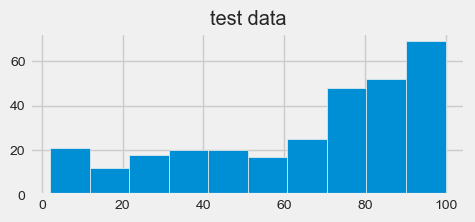

In [62]:
plt.hist(y_test)
plt.tick_params(axis='both', labelsize=10)
plt.title('test data')

In [63]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [64]:
prediction = regressor.predict(X_test)
# средняя абсолютная ошибка
metrics.mean_absolute_error(y_test, prediction)

15.829577697490654

In [65]:
# средняя квадратичная ошибка
metrics.mean_squared_error(y_test, prediction)

507.35125997706535

In [66]:
print(y_test[:10])

3637     39
5593     81
1975     52
11032    93
4025     98
14087    93
8487     89
9525     88
1436     12
11470    96
Name: ENERGY STAR Score, dtype: Int64


In [67]:
print(prediction[:10])

[74.55524804 62.98427583 51.49291185 81.48310974 85.01217357 27.69727058
 65.96195711 71.26030714 48.94200909 79.63172361]


In [68]:
type(y_test)

pandas.core.series.Series

In [69]:
y_arr = y_test.to_numpy()
y_arr

array([39, 81, 52, 93, 98, 93, 89, 88, 12, 96, 81, 61, 82, 91, 91, 84, 63,
       100, 68, 76, 89, 99, 61, 98, 92, 88, 66, 73, 85, 83, 37, 64, 82,
       88, 80, 92, 20, 45, 93, 56, 98, 89, 52, 29, 37, 50, 22, 88, 100,
       18, 59, 77, 71, 100, 41, 74, 12, 75, 87, 93, 30, 27, 2, 81, 97, 58,
       69, 78, 35, 73, 77, 84, 7, 90, 10, 74, 42, 90, 79, 73, 92, 37, 41,
       92, 25, 79, 98, 100, 43, 89, 72, 79, 50, 29, 86, 7, 63, 84, 63, 3,
       54, 46, 99, 48, 34, 25, 100, 98, 100, 24, 45, 34, 73, 94, 81, 90,
       98, 11, 56, 48, 81, 96, 92, 8, 95, 78, 80, 97, 63, 34, 72, 53, 34,
       77, 73, 100, 59, 23, 80, 100, 83, 89, 56, 94, 83, 100, 92, 83, 51,
       31, 17, 94, 100, 100, 63, 70, 30, 22, 76, 96, 100, 99, 75, 94, 35,
       67, 74, 83, 92, 25, 92, 96, 45, 43, 99, 46, 30, 66, 63, 54, 4, 38,
       13, 23, 47, 83, 99, 95, 63, 100, 9, 60, 89, 76, 92, 45, 78, 89, 11,
       42, 84, 85, 88, 68, 73, 68, 80, 18, 91, 85, 23, 79, 75, 84, 86, 80,
       87, 4, 69, 15, 69, 100, 56, 75, 

In [70]:
prediction

array([ 74.55524804,  62.98427583,  51.49291185,  81.48310974,
        85.01217357,  27.69727058,  65.96195711,  71.26030714,
        48.94200909,  79.63172361,  69.3795863 ,  73.97536316,
        80.23747079,  87.99277477,  76.79990201,  72.88450709,
        74.49491231,  95.48754392,  77.99637817,  81.05291537,
        48.41608073,  27.07264897,  68.31465075,  81.61544052,
        76.07743883,  81.44996294,  61.47008538,  83.62280136,
        70.61415343,  59.50356353,  51.79855443,  75.11937791,
        27.35292476,  79.88866557,  84.55378953,  83.07039575,
        18.86999238,  57.49656207,  70.60560931,  70.23852493,
        80.93741053,  75.31464996,  64.13926235,  56.45058566,
        70.57830093,  51.38522953,  30.52484507,  71.27996462,
       104.17293172,  61.45191912,  62.40770788,  74.03811767,
        61.98822876,  96.64513293,  64.54501273,  70.08902239,
        43.09125014,  63.99718585,  81.23072549,  71.08795455,
        52.15008815,  55.2927186 ,  17.57743531,  74.25

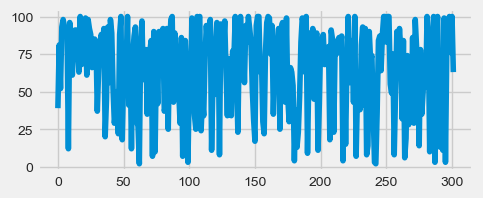

In [71]:
plt.plot(y_arr)

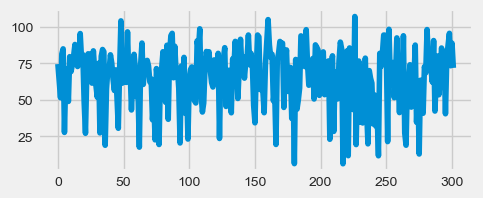

In [72]:
plt.plot(prediction)